# Emergency - 911 Calls
Montgomery County, PA

In this project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)



# TABLE OF CONTENTS: 

- Set up and data cleaning 
- Initial observations
- Building upon existing structure
- Deep dive with accompanying primary visualisations
- Expanded visualisations
- Conclusion

## Data and Setup

In [1]:
import numpy as np
import pandas as pd 
import os 

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [3]:
os.chdir(r'C:\Users\X\downloads')

In [ ]:
for f in os.listdir(r'C:\Users\X\downloads'):
    print(f)

In [5]:
df = pd.read_csv('911.csv')

In [6]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** 

-Most of the variables are quantitative with the exception of the title (which may be a primary focus) and the address information.
-It may be beneficial to modify the column names as well as extract additional insights from the title and timestamp.

**

In [8]:
df1 = df.rename(columns={'lat':'Latitude','lng':'Longitude', 'desc':'Description', 'zip':'Zipcode', 'title':'Title','twp':'Township', 'addr':'Address'})

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Latitude     99492 non-null  float64
 1   Longitude    99492 non-null  float64
 2   Description  99492 non-null  object 
 3   Zipcode      86637 non-null  float64
 4   Title        99492 non-null  object 
 5   timeStamp    99492 non-null  object 
 6   Township     99449 non-null  object 
 7   Address      98973 non-null  object 
 8   e            99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


## Initial review

** What are the top 5 zipcodes for 911 calls? **

In [9]:
df1['Zipcode'].value_counts()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
           ... 
19139.0       1
36107.0       1
19457.0       1
17752.0       1
19119.0       1
Name: Zipcode, Length: 104, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [10]:
df1['Township'].value_counts()

LOWER MERION     8443
ABINGTON         5977
NORRISTOWN       5890
UPPER MERION     5227
CHELTENHAM       4575
                 ... 
BRYN ATHYN        173
SALFORD           163
GREEN LANE         51
PHILA COUNTY       43
LEHIGH COUNTY      30
Name: Township, Length: 68, dtype: int64

** How many unique title codes are there in the Title column? **

In [11]:
df1['Title'].nunique()

110

## Creating new features

** 1: What is the most common Reason for a 911 calls? **

In [12]:
df1['Reason'] = df1['Title'].apply(lambda x: x.split(':')[0])

In [13]:
df1['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Reason behind 911 call')

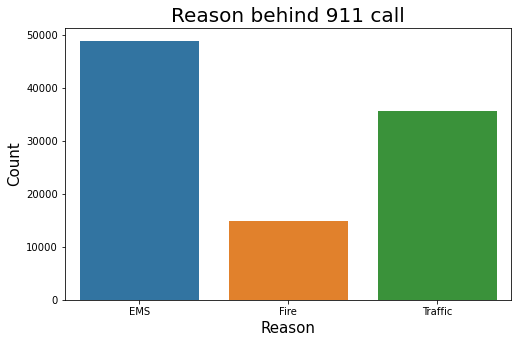

In [14]:
sns.set_palette(sns.color_palette('tab10'))

f, ax = plt.subplots(figsize=(8,5))

sns.countplot(df1.Reason)

plt.ylabel('Count', fontsize= 15)
plt.xlabel('Reason', fontsize= 15)
plt.title('Reason behind 911 call', fontsize= 20)


___
** 2: Altering the certain variables to that the data can be optimised **

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Latitude     99492 non-null  float64       
 1   Longitude    99492 non-null  float64       
 2   Description  99492 non-null  object        
 3   Zipcode      86637 non-null  float64       
 4   Title        99492 non-null  object        
 5   timeStamp    99492 non-null  datetime64[ns]
 6   Township     99449 non-null  object        
 7   Address      98973 non-null  object        
 8   e            99492 non-null  int64         
 9   Reason       99492 non-null  object        
 10  Hour         99492 non-null  int64         
 11  Month        99492 non-null  int64         
 12  Day of Week  99492 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 9.9+ MB


In [20]:
df1['timeStamp'] = pd.to_datetime(df1['timeStamp'])

In [21]:
time = df1['timeStamp'].iloc[0]

time.hour

17

In [22]:
df1['Hour'] = df1['timeStamp'].apply(lambda time: time.hour)
df1['Month'] = df1['timeStamp'].apply(lambda time: time.month)
df1['Day of Week'] = df1['timeStamp'].apply(lambda time: time.dayofweek)

df1

,Latitude,Longitude,Description,Zipcode,Title,timeStamp,Township,Address,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,2
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,2
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,2
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,2


In [23]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [24]:
df1['Day of Week'] = df1['Day of Week'].map(dmap)

In [25]:
df1['Day of Week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

# Deep dive with accompanying visualisations

** 1: What days of the week are the busiest in terms of the type of calls?**

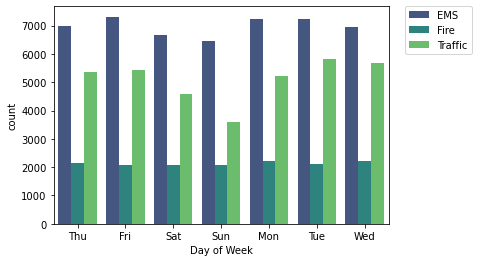

In [26]:
sns.countplot(x=df1['Day of Week'], data= df1, hue= 'Reason', palette= 'viridis')

plt.legend(bbox_to_anchor= (1.05,1), loc= 2, borderaxespad= 0.)


** 2: Which months of the year contain the most frequent amount of calls? **

In [28]:
byMonths = df1.groupby('Month').count().head(20)
byMonths

,Latitude,Longitude,Description,Zipcode,Title,timeStamp,Township,Address,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


<AxesSubplot:xlabel='Month'>

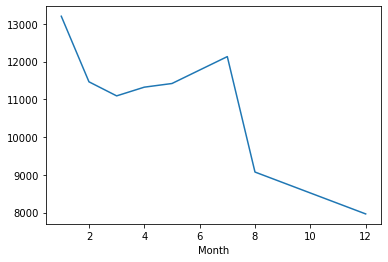

In [29]:
byMonths['Township'].plot()

* As the dataset seems to be missing values, it may be appropriate to extrapolate to answer the aforementioned question *

<AxesSubplot:xlabel='Month', ylabel='Township'>

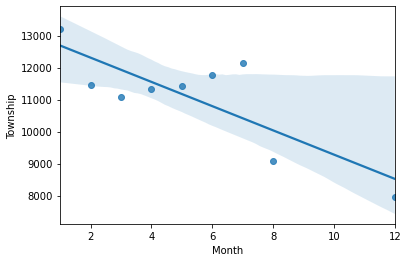

In [30]:
sns.regplot(x='Month',y='Township',data=byMonths.reset_index())

 ** 3:How spread out where the calls in terms of the geographical townships? ** 

In [31]:
df1

,Latitude,Longitude,Description,Zipcode,Title,timeStamp,Township,Address,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,Wed
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,Wed
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,Wed
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,Wed


In [32]:
df1['Date']=df1['timeStamp'].apply(lambda t: t.date())


In [33]:
widespread = df1.groupby('Date').count()['Township']

widespread

Date
2015-12-10    115
2015-12-11    395
2015-12-12    403
2015-12-13    319
2015-12-14    446
             ... 
2016-08-20    328
2016-08-21    357
2016-08-22    388
2016-08-23    439
2016-08-24    132
Name: Township, Length: 259, dtype: int64

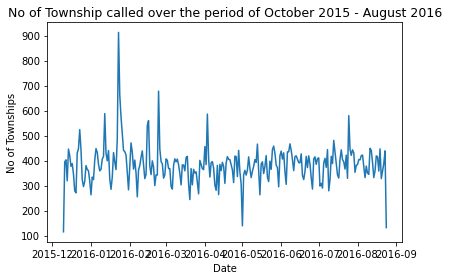

In [34]:
df1.groupby('Date').count()['Township'].plot()

plt.title('No of Township called over the period of October 2015 - August 2016',fontsize= 12.5 )
plt.ylabel('No of Townships')
plt.tight_layout()

** 4: What is the trend in each type of call during the aforementioned period? ** 

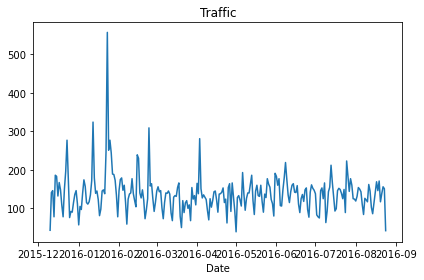

In [35]:
df1[df1['Reason']=='Traffic'].groupby('Date').count()['Township'].plot()
plt.title('Traffic')
plt.tight_layout()

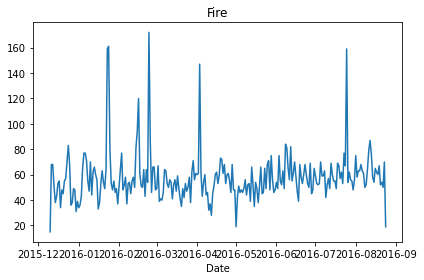

In [36]:
df1[df1['Reason']=='Fire'].groupby('Date').count()['Township'].plot()
plt.title('Fire')
plt.tight_layout()

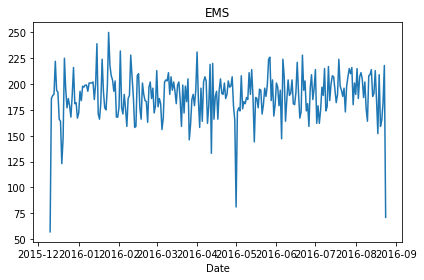

In [37]:
df1[df1['Reason']=='EMS'].groupby('Date').count()['Township'].plot()
plt.title('EMS')
plt.tight_layout()

# Expanded visualisations

** 1: Heatmap of the type of calls during the week **

In [38]:
df1.groupby(['Day of Week', 'Hour']).count()['Reason'].reset_index()

,Day of Week,Hour,Reason
0,Fri,0,275
1,Fri,1,235
2,Fri,2,191
3,Fri,3,175
4,Fri,4,201
...,...,...,...
163,Wed,19,686
164,Wed,20,668
165,Wed,21,575
166,Wed,22,490


In [ ]:
df

In [40]:
dayHour = df1.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

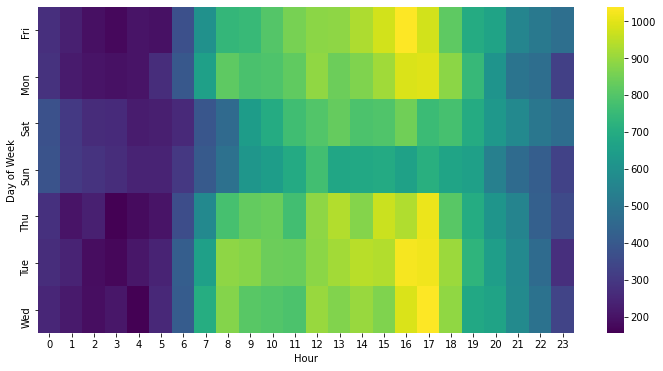

In [42]:
plt.figure(figsize= (12,6))
sns.heatmap(dayHour, cmap= 'viridis')

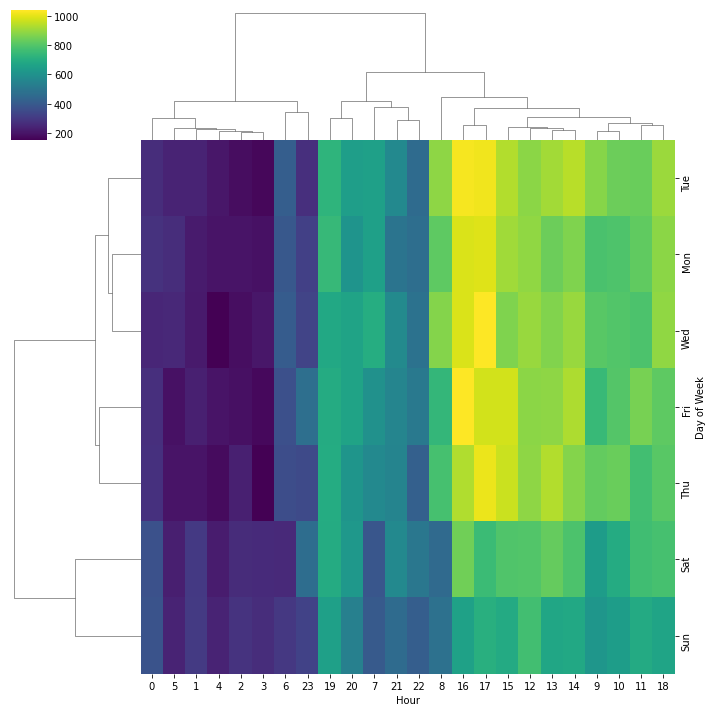

In [45]:
sns.clustermap(dayHour, cmap= 'viridis')

In [46]:
dayMonth = df1.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


** 2: Heatmap of the frequency of the calls for each day during each month of the year? **

<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

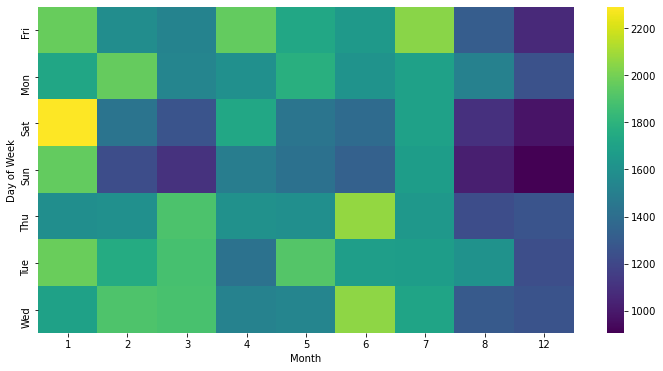

In [48]:
plt.figure(figsize= (12,6))

sns.heatmap(dayMonth, cmap= 'viridis')

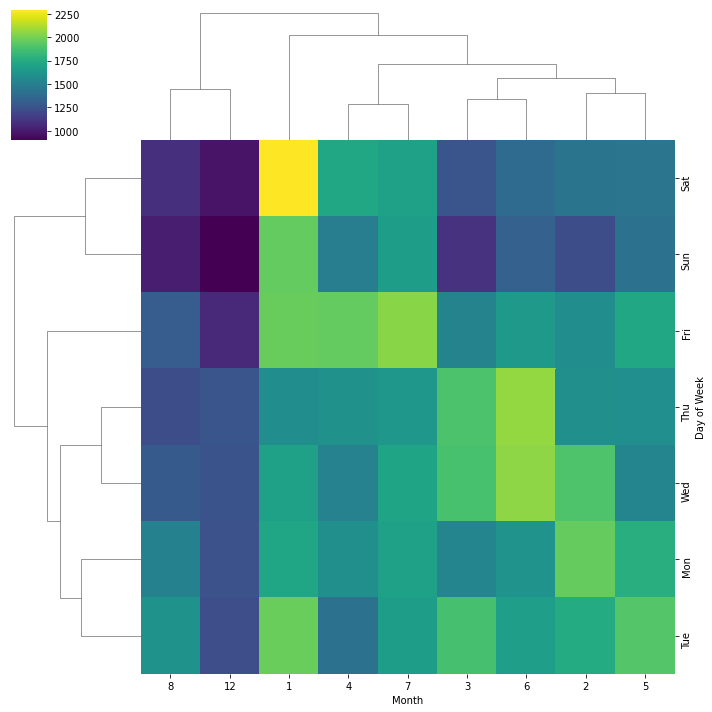

In [49]:
sns.clustermap(dayMonth, cmap= 'viridis')


# END